In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

In [2]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [3]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [5]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

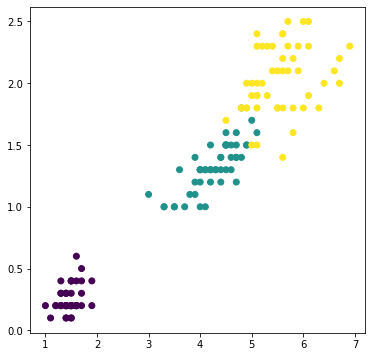

In [6]:
# Visualize our data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [7]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 0.8900535175683366
Loss at iteration 500 0.17757383989917544
Loss at iteration 1000 0.1332633016100001
Loss at iteration 1500 0.11533461146046943
Loss at iteration 2000 0.10531450534327548
Loss at iteration 2500 0.09880023254538177
Loss at iteration 3000 0.09417231335586539
Loss at iteration 3500 0.09068594530366654
Loss at iteration 4000 0.0879475248075694
Loss at iteration 4500 0.08572819025963002
Loss at iteration 5000 0.08388521867109724
Loss at iteration 5500 0.08232469901043478
Loss at iteration 6000 0.08098215433347934
Loss at iteration 6500 0.07981175854420523
Loss at iteration 7000 0.07877999194056125
Loss at iteration 7500 0.07786173356545595
Loss at iteration 8000 0.07703776048257044
Loss at iteration 8500 0.07629309451191353
Loss at iteration 9000 0.07561587820852705
Loss at iteration 9500 0.0749965918244319
time taken: 0.4038558006286621
=========Classification report=======
Report:                precision    recall  f1-score   support

           0   

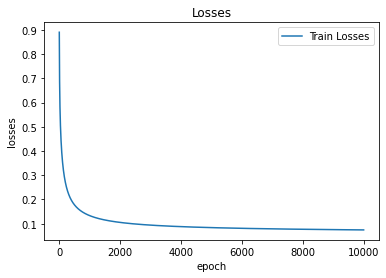

In [8]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.0532665396122027
Loss at iteration 500 0.3645121949295677
Loss at iteration 1000 0.22217313677388237
Loss at iteration 1500 0.19083946063005877
Loss at iteration 2000 0.25406249953049265
Loss at iteration 2500 0.06823219657822513
Loss at iteration 3000 0.13668215917560095
Loss at iteration 3500 0.15831362619003522
Loss at iteration 4000 0.12035186491135554
Loss at iteration 4500 0.17030230377812758
Loss at iteration 5000 0.16240669824967824
Loss at iteration 5500 0.10223586038015597
Loss at iteration 6000 0.09848536262167072
Loss at iteration 6500 0.0983039454278327
Loss at iteration 7000 0.10964181247806734
Loss at iteration 7500 0.1258484334599298
Loss at iteration 8000 0.14770679737522374
Loss at iteration 8500 0.28207667419707133
Loss at iteration 9000 0.09832419736652233
Loss at iteration 9500 0.0751023270791397
time taken: 0.4097731113433838
=========Classification report=======
Report:                precision    recall  f1-score   support

           0    

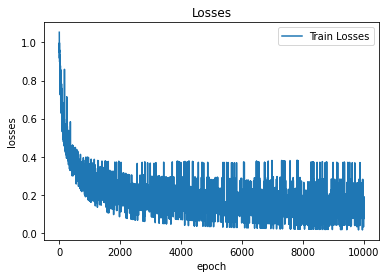

In [9]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.3320805356694454
Loss at iteration 500 0.5256051696458989
Loss at iteration 1000 0.4745025014397426
Loss at iteration 1500 0.34850103045819547
Loss at iteration 2000 1.2182837330196323
Loss at iteration 2500 0.5186932377165165
Loss at iteration 3000 0.19625563401573534
Loss at iteration 3500 0.9604334888573204
Loss at iteration 4000 0.90524941385859
Loss at iteration 4500 0.40138793792000727
Loss at iteration 5000 0.8603512270379061
Loss at iteration 5500 0.8188570157221912
Loss at iteration 6000 0.8939443657713799
Loss at iteration 6500 0.22611367280986253
Loss at iteration 7000 0.5299846639630764
Loss at iteration 7500 0.1529913019621158
Loss at iteration 8000 0.7253930683029435
Loss at iteration 8500 0.966191642363642
Loss at iteration 9000 0.8919422696810396
Loss at iteration 9500 0.10882780712265504
time taken: 0.358231782913208
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1

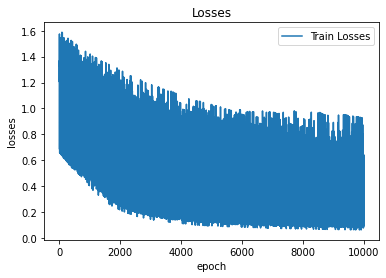

In [10]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))